In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(
    '../data/processed/job_offers_v1.csv',
    sep=';',
    encoding='UTF-8')
df.head()

,name,company,technology,job,location_city,salary_low,salary_high,salary_currency,salary_avg,location_country,is_senior
0,"data analytics analyst, senior associate",State Street,• Python,data analyst,kraków,6916,9000,PLN,7958.0,NaN,1
1,data analyst,MiKa,NaN,data analyst,not listed,8971,13456,PLN,11213.5,NaN,0
2,bi manager,Link Group,NaN,data analyst,warszawa,20000,30000,PLN,25000.0,NaN,0
3,data scientist,Mindbox S.A.,• Google Cloud Platform,data analyst,not listed,25200,31500,PLN,28350.0,NaN,0
4,senior data analyst - corporate audit,State Street,NaN,data analyst,kraków,12666,17000,PLN,14833.0,NaN,1


job
data analyst      17
data engineer     66
data scientist    13
dtype: int64


<AxesSubplot:xlabel='job'>

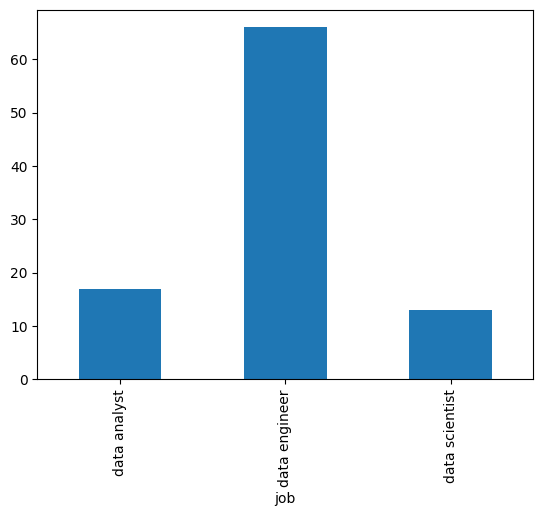

In [8]:
job_offers = df.groupby(by=['job']).size()

print(job_offers)
job_offers.plot.bar()

location_city  job           
budapest       data engineer      4
               data scientist     1
gliwice        data analyst       1
kraków         data analyst       4
               data engineer      7
               data scientist     1
lublin         data scientist     1
not listed     data analyst       6
               data engineer     37
               data scientist     6
olsztyn        data analyst       1
poznań         data engineer      3
warszawa       data analyst       4
               data engineer     15
               data scientist     3
wrocław        data analyst       1
               data scientist     1
dtype: int64


<AxesSubplot:xlabel='location_city,job'>

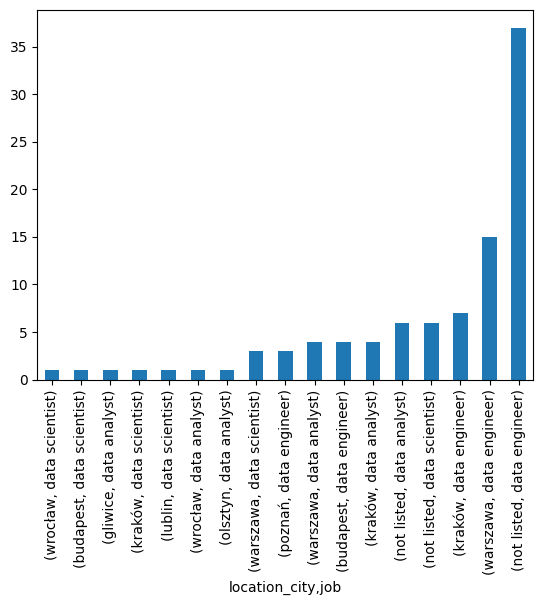

In [9]:
offers_by_city = df.groupby(by=['location_city', 'job']).size()

print(offers_by_city)
offers_by_city.sort_values().plot.bar()

                  salary_avg  count
job                                
data analyst    17473.205882     17
data scientist  23300.076923     13
data engineer   23581.295455     66


array([[<AxesSubplot:title={'center':'salary_avg'}, xlabel='job'>,
        <AxesSubplot:title={'center':'count'}, xlabel='job'>]],
      dtype=object)

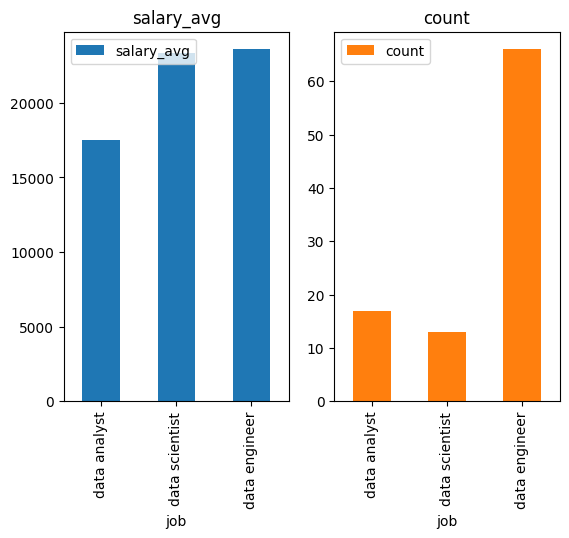

In [10]:
offer_salary = df.groupby(by=['job']).agg({'salary_avg': 'mean', 'name': 'count'})
offer_salary.sort_values(by=['salary_avg'], inplace=True)
offer_salary.rename(columns={'name':'count'}, inplace=True)

print(offer_salary)
offer_salary.plot(subplots=True, layout=(1, 2), kind='bar')

In [11]:
offer_salary_by_city = df.groupby(by=['location_city']).agg({'salary_avg': 'mean', 'name': 'count'})
offer_salary_by_city.sort_values(by=['salary_avg'], inplace=True)
offer_salary_by_city.rename(columns={'name':'count'}, inplace=True)

offer_salary_by_city

,salary_avg,count
location_city,,
olsztyn,4800.000000,1
gliwice,8750.000000,1
wrocław,14500.000000,2
budapest,15335.700000,5
lublin,19740.000000,1
warszawa,20061.090909,22
poznań,22533.333333,3
kraków,23382.583333,12
not listed,25057.295918,49


<AxesSubplot:xlabel='location_city'>

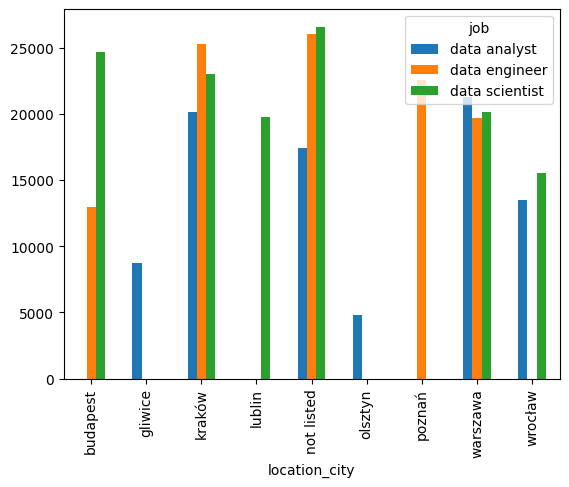

In [12]:
df.pivot_table(index='location_city', columns='job', values='salary_avg').plot(kind='bar')

In [13]:
salary_by_senior = df.groupby(by=['job', 'is_senior']).agg({'salary_avg': 'mean', 'name': 'count'})
salary_by_senior

salary_avg  name
job            is_senior                    
data analyst   0          17849.535714    14
               1          15717.000000     3
data engineer  0          22699.870000    50
               1          26335.750000    16
data scientist 0          22877.363636    11
               1          25625.000000     2